In [1]:
# Multiple fleets, Graphs

#### On Feb 28 2023 

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
sns.set(rc={'figure.figsize':(20,14)})
sns.set_theme(style="whitegrid")

In [5]:
#df_lorenz = pd.read_csv('C:/Users/annik/tmpOnATBcomputer/sf_2018_stacked_rh_fltsz_price_1.csv')
df_lorenz = pd.read_csv('C:/Users/annik/tmpOnATBcomputer/sf_2018_stacked_rh_fltsz_price_incRank_1_2.csv')

In [6]:
#df_lorenz.info()
#print(df_lorenz.columns.tolist())
print(df_lorenz.columns.values)

['incRank' 'n_agents' 'n_trips' 'Potential_INEXUS_mean'
 'Potential_INEXUS_median' 'cost_BEAM_mean' 'cost_BEAM_median'
 'cost_BEAM_sum' 'distance_bike_mean' 'distance_bike_median'
 'distance_bike_sum' 'distance_mode_choice_mean'
 'distance_mode_choice_median' 'distance_mode_choice_sum'
 'distance_privateCar_mean' 'distance_privateCar_median'
 'distance_privateCar_sum' 'distance_ridehail_mean'
 'distance_ridehail_median' 'distance_ridehail_sum'
 'distance_transit_mean' 'distance_transit_median' 'distance_transit_sum'
 'distance_travelling_mean' 'distance_travelling_median'
 'distance_travelling_sum' 'distance_walking_mean'
 'distance_walking_median' 'distance_walking_sum'
 'duration_door_to_door_mean' 'duration_door_to_door_median'
 'duration_door_to_door_sum' 'duration_in_privateCar_mean'
 'duration_in_privateCar_median' 'duration_in_privateCar_sum'
 'duration_in_ridehail_mean' 'duration_in_ridehail_median'
 'duration_in_ridehail_sum' 'duration_in_transit_mean'
 'duration_in_transit_me

In [7]:
df_lorenz["theNumber1"] = 1
df_lorenz["baseline"] = df_lorenz["theNumber1"].where( df_lorenz['lever_position_price'].eq(1.0) 
                                                     & df_lorenz['lever_position_fltsz'].eq(1.0) 
                                                     & df_lorenz['lever_n_fleets'].eq(2.0),
                                                     0)

In [8]:
# CHOOSE which to make relative to baseline
temp_varName = "Potential_INEXUS_mean" # Potential_INEXUS_mean
temp_varNameRel = "PI_mean_relToBase" # 

df_lorenz['temp_varName_baseOnly'] = df_lorenz[temp_varName].where(df_lorenz['baseline']==1) # only not NA if it's at baseline
df_lorenz['temp_varName_base'] = df_lorenz.groupby(["incRank"])['temp_varName_baseOnly'].transform('max')
df_lorenz[temp_varNameRel]=df_lorenz['temp_varName_base']-df_lorenz[temp_varName]
#df_lorenz.groupby(["incRank"])[temp_varName].describe()
#df_lorenz.groupby(["incRank"])['temp_varName_base'].describe()
df_lorenz[['baseline','incRank',temp_varNameRel,'temp_varName_base','incomeInThousands_mean','Potential_INEXUS_mean','temp_varName_baseOnly','temp_varName_base',temp_varNameRel,'lever_n_fleets', 'lever_position_fltsz','lever_position_price']].head(56)

,baseline,incRank,PI_mean_relToBase,temp_varName_base,incomeInThousands_mean,Potential_INEXUS_mean,temp_varName_baseOnly,temp_varName_base,PI_mean_relToBase,lever_n_fleets,lever_position_fltsz,lever_position_price
0,0,0,-0.005035,-0.625537,6.956518,-0.620502,NaN,-0.625537,-0.005035,1,1.0,1.0
1,0,1,0.008447,-0.639695,17.812971,-0.648142,NaN,-0.639695,0.008447,1,1.0,1.0
2,0,2,0.000275,-0.665052,25.798051,-0.665327,NaN,-0.665052,0.000275,1,1.0,1.0
3,0,3,0.000265,-0.578197,33.613756,-0.578462,NaN,-0.578197,0.000265,1,1.0,1.0
4,0,4,0.000996,-0.580526,41.727301,-0.581522,NaN,-0.580526,0.000996,1,1.0,1.0
5,0,5,0.002687,-0.576301,49.535819,-0.578988,NaN,-0.576301,0.002687,1,1.0,1.0
6,0,6,0.004372,-0.559380,57.311550,-0.563752,NaN,-0.559380,0.004372,1,1.0,1.0
7,0,7,0.004978,-0.544603,65.312427,-0.549580,NaN,-0.544603,0.004978,1,1.0,1.0
8,0,8,0.007474,-0.570483,73.395823,-0.577957,NaN,-0.570483,0.007474,1,1.0,1.0
9,0,9,0.008120,-0.564655,82.290407,-0.572775,NaN,-0.564655,0.008120,1,1.0,1.0


In [9]:
#plt.hist(df_lorenz[temp_varNameRel])

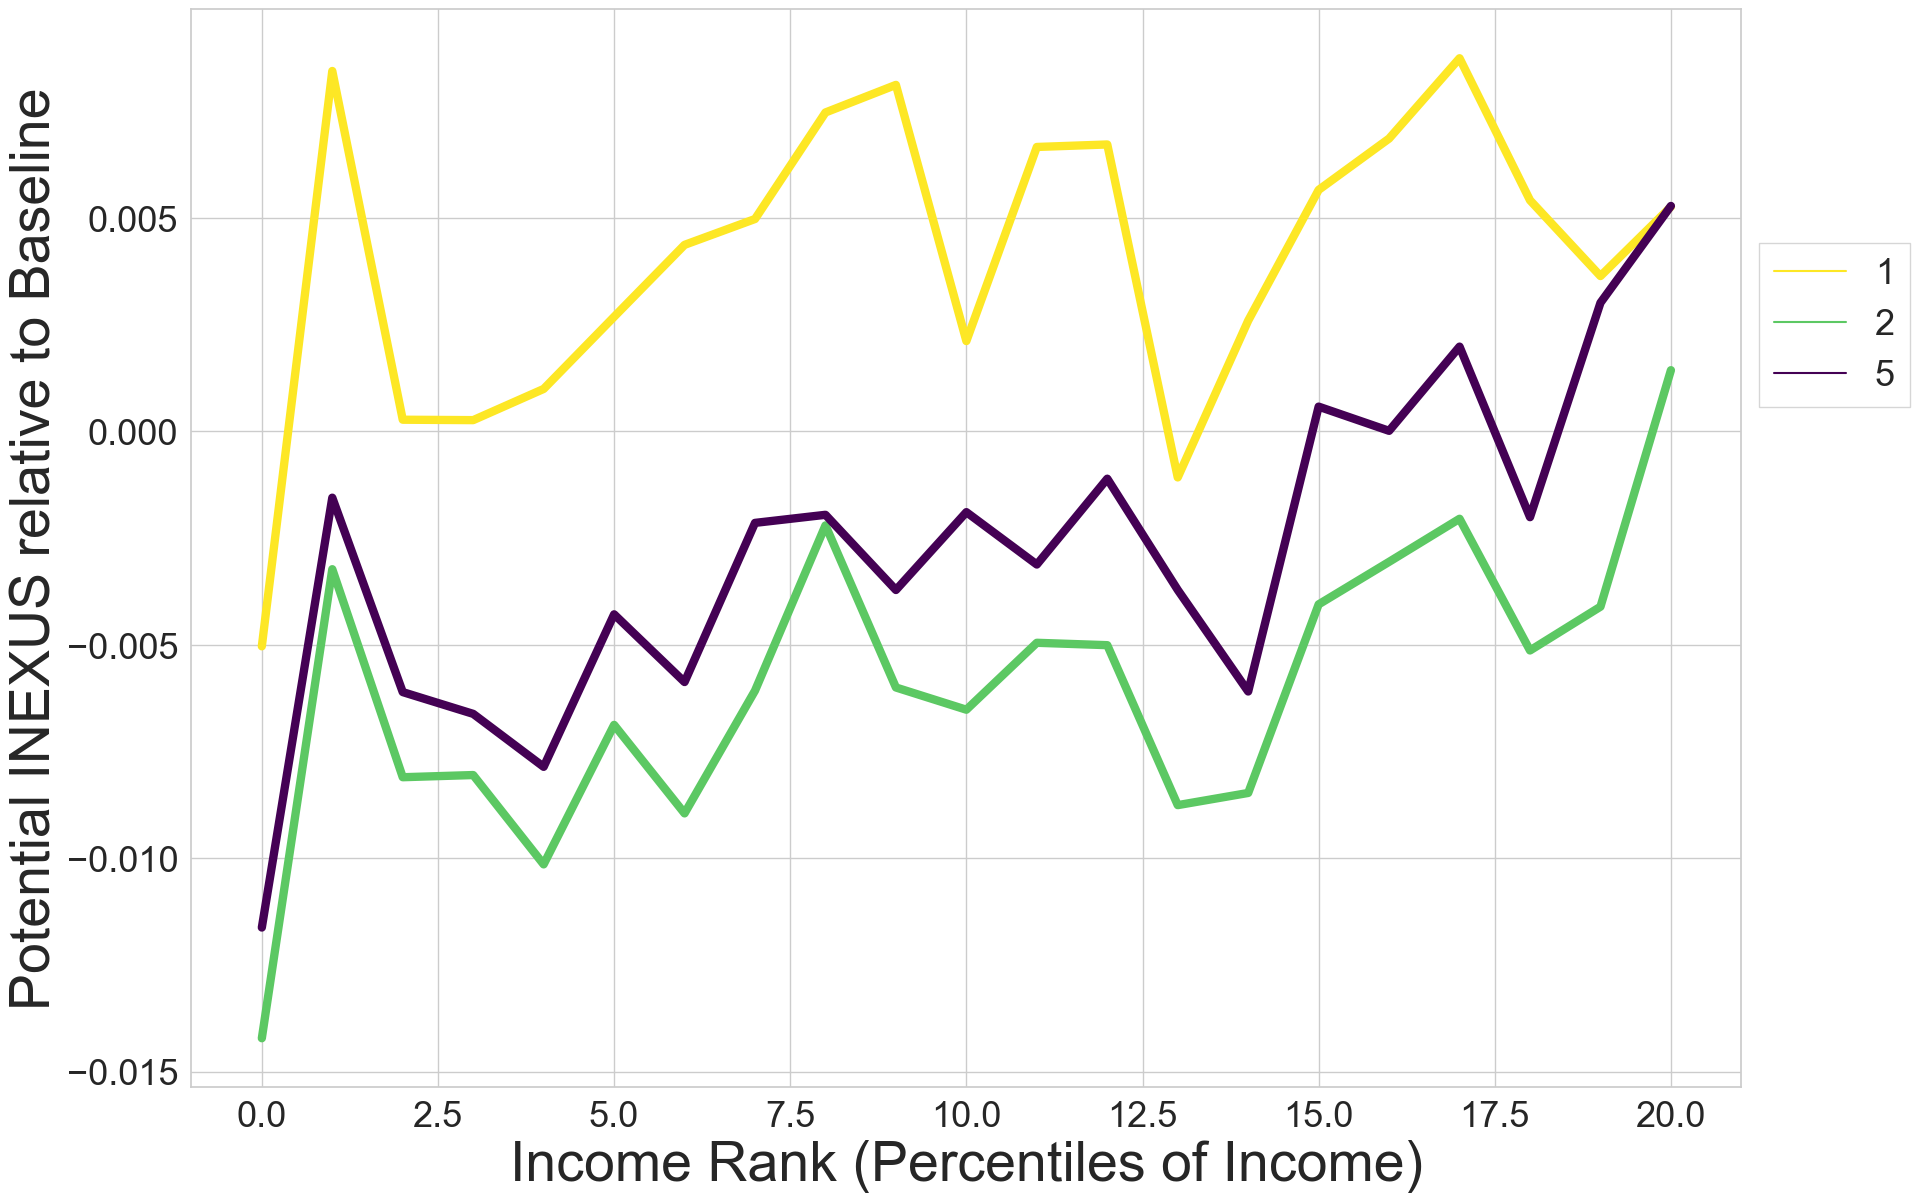

In [13]:
t_plot = sns.lineplot(data = df_lorenz.loc[(df_lorenz['lever_position_price']==1)&(df_lorenz['lever_position_fltsz']>=-1)&(df_lorenz['lever_n_fleets']>=-1)], 
             x = 'incRank', 
             y = temp_varNameRel, 
             hue = 'lever_n_fleets', 
             #palette = palette, 
             ci=None, linewidth = 6,
             palette = 'viridis_r'
            )
t_plot.set_xlabel('Income Rank (Percentiles of Income)', fontsize = 40)
t_plot.set_ylabel('Potential INEXUS relative to Baseline', fontsize = 40)
t_plot.yaxis.set_tick_params(labelsize = 26)
t_plot.xaxis.set_tick_params(labelsize = 26)
t_plot.legend(fontsize='medium', fancybox=False, bbox_to_anchor=(1, 0.8), ncol=1, frameon=True, loc = 'best', prop={'size': 26})
plt.savefig('lorenz_viridisATB.svg', format='svg')
#plt.savefig('lorenz_viridisATB.png', dpi=1000)

In [11]:
#fig, ax = plt.subplots()
#ax = sns.lineplot(data = df_lorenz.loc[(df_lorenz['lever_position']>-1)|(df_lorenz['lever_position_fleetsize']==1)], x = 'incRank', 
#plt.legend(labels = ['0% Price', '12.5% Price', '25% Price','50% Price','Baseline','175% Price','300% Price', '500% Price','800% Price'],